In [1]:
import pandas as pd
! pip install langdetect
! pip install nltk
! pip install WordCloud
! pip install afinn
import nltk

Processing ./.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a/langdetect-1.0.9-py3-none-any.whl
  Using cached nltk-3.6.2-py3-none-any.whl (1.5 MB)
     |████████████████████████████████| 721 kB 5.7 MB/s eta 0:00:01
  Using cached wordcloud-1.8.1-cp37-cp37m-manylinux1_x86_64.whl (366 kB)
Processing ./.cache/pip/wheels/9d/16/3a/9f0953027434eab5dadf3f33ab3298fa95afa8292fcf7aba75/afinn-0.1-py3-none-any.whl


In [2]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

In [4]:
reviews = pd.read_csv('reviews after 2019.csv')
reviews = reviews.drop(columns = 'Unnamed: 0')

In [ ]:
REVIEWS CLEANING

In [ ]:
We will first remove the non-english comments using the LangDetect module

In [5]:
from langdetect import detect
from langdetect import DetectorFactory
DetectorFactory.seed = 0

#testing language detection
detect('First class')

'en'

In [6]:
reviews.dropna(axis = 'index', subset=['comments'], inplace=True)

In [7]:
#function detecting the language of each review
def language_detection(text):
    try:
        return detect(text)
    except:
        return None

In [8]:
#inserting a new feature of the detected language
reviews['language'] = reviews['comments'].apply(language_detection)

In [12]:
#removing the comments containing the expression 'the host cancelled the reservation. This is an automated posting'
reviews = reviews[~reviews.comments.str.contains((expression))]

In [13]:
#verifying the number of comments that contain the expression 
expression =  'This is an automated posting '
count=0
for comment in reviews.comments:
    if expression in comment:
        count+=1
print(count)

0


In [16]:
#saving the new df to avoid long running time
#reviews.to_csv('processed_reviews.csv')
processed_reviews = pd.read_csv('processed_reviews.csv')

In [17]:
processed_reviews.head()

,Unnamed: 0,Unnamed: 0.1,listing_id,id,date,comments,language
0,0,0,23691,438406815,2019-04-16,"Great, cozy space. Would stay again",en
1,1,1,23691,442476822,2019-04-23,Great second visit- same level of hospitality ...,en
2,2,2,23691,516588467,2019-08-24,Nice private space with full kitchen and all t...,en
3,3,3,23691,522722658,2019-09-02,Yohan and Sarah’s place was lovely. Very clean...,en
4,4,4,23691,542525855,2019-10-06,"Great hosts, responsive and very accommodating!",en


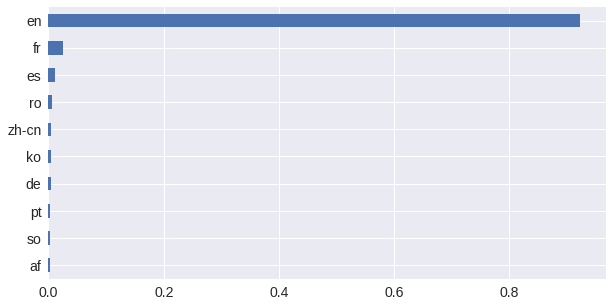

In [18]:
#distribution of the languages
processed_reviews.language.value_counts(normalize=True).head(10).sort_values().plot(kind = 'barh', figsize=(10,5), fontsize=14)

In [19]:
#keeping the english language
processed_reviews_en = processed_reviews[(processed_reviews['language']=='en')]

In [21]:
processed_reviews_en.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193772 entries, 0 to 210631
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Unnamed: 0    193772 non-null  int64 
 1   Unnamed: 0.1  193772 non-null  int64 
 2   listing_id    193772 non-null  int64 
 3   id            193772 non-null  int64 
 4   date          193772 non-null  object
 5   comments      193772 non-null  object
 6   language      193772 non-null  object
dtypes: int64(4), object(3)
memory usage: 11.8+ MB


In [ ]:
VISUALIZING THE DATA WITH WORDCLOUD

In [22]:
#visualizing the data with word cloud
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter
from PIL import Image
import re
import string

In [26]:
def plot_wordcloud(wordcloud, language):
    plt.figure(figsize=(12, 10))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.title(language + ' Comments\n', fontsize=18, fontweight='bold')
    plt.show()

In [24]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
#list of the the stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

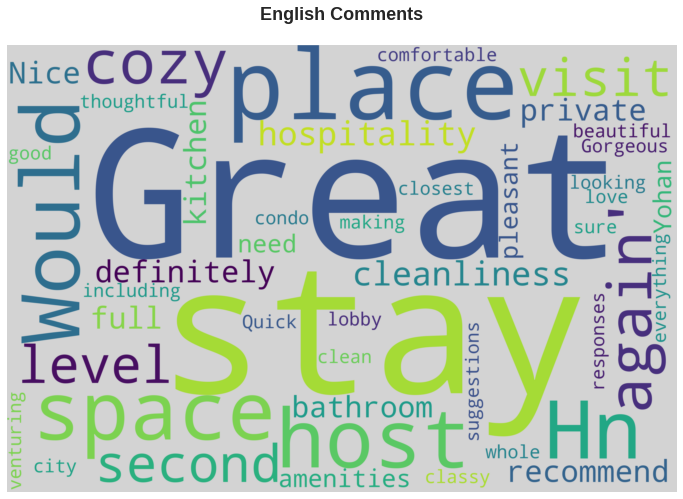

In [31]:
wordcloud = WordCloud(max_font_size=None, max_words=200, background_color="lightgrey", 
                      width=3000, height=2000,
                      stopwords=stopwords.words('english')).generate(str(processed_reviews_en.comments.values))

plot_wordcloud(wordcloud, 'English')

In [50]:
processed_reviews_en = pd.read_csv('processed_reviews_en.csv')

In [32]:
# initialize afinn sentiment analyzer
#Afinn has preprocessed the text by removing the punctuation, converting all the words to lower-case

from afinn import Afinn
af = Afinn()

# compute sentiment scores (polarity) and labels
sentiment_scores = [af.score(article) for article in processed_reviews_en.comments]
sentiment_category = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in sentiment_scores]


In [33]:
processed_reviews_en['sentiment_scores'] = sentiment_scores
processed_reviews_en['sentiment_category'] = sentiment_category

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
processed_reviews_en.sentiment_scores.describe()

count    193772.000000
mean          8.732350
std           6.265366
min         -44.000000
25%           5.000000
50%           8.000000
75%          12.000000
max         109.000000
Name: sentiment_scores, dtype: float64

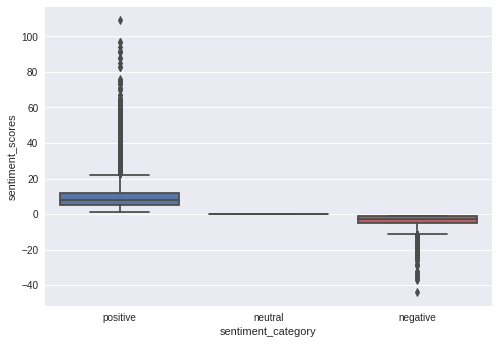

In [37]:
sns.boxplot(y='sentiment_scores', x='sentiment_category', data = processed_reviews_en)
plt.show()

In [38]:
#counting the number of comments that contain the expression 'the host cancelled the reservation. This is an automated postins'
expression =  'This is an automated posting'
count=0
for comment in processed_reviews_en.comments:
    if expression in comment:
        count+=1
print(count)

844


In [39]:
##removing the comments containing this expression
processed_reviews_en = processed_reviews_en[~processed_reviews_en.comments.str.contains((expression))]

In [40]:
#checking the negative comments 
columns_to_display = ['comments', 'sentiment_scores']
print(processed_reviews_en.sort_values(by='sentiment_scores')[columns_to_display].head(20))

                                                 comments  sentiment_scores
6943    I feel it is important to warn potential guest...             -44.0
49479   I don’t like writing negative reviews and I’ve...             -37.0
196214  My whole experience with this air bnb was terr...             -36.0
32004   TLDR: This is a pretty nice place, except for ...             -36.0
174610  this review is a frustrating one to write beca...             -35.0
165769  First of all: the location of the apartment is...             -34.0
119681  The host misrepresented themselves claiming th...             -33.0
15890   I will start off by saying Ice herself is a ve...             -32.0
78362   Maryam’s Airbnb was the worst experience I hav...             -29.0
125612  I hate negativity or leaving bad reviews, but ...             -28.0
86849   Please do yourselves a favour and scroll down ...             -28.0
33236   Do NOT stay here. The building is cheaply made...             -26.0
51039   We h

In [42]:
#removing the punctuation
import string
processed_reviews_en['comments'] = processed_reviews_en['comments'].str.translate(str.maketrans("","", string.punctuation))

In [43]:
#counting the words in each comment
def word_count(text_string):
    '''Calculate the number of words in a string'''
    return len(text_string.split())

processed_reviews_en['word_count'] = processed_reviews_en['comments'].apply(word_count)

In [44]:
processed_reviews_en.word_count.describe()

count    192928.000000
mean         34.862384
std          40.680019
min           1.000000
25%          11.000000
50%          23.000000
75%          44.000000
max        1000.000000
Name: word_count, dtype: float64

In [45]:
#calculating the sentiment_scores_adjusted to the number of words in each comment
processed_reviews_en['sentiment_scores_adj'] = processed_reviews_en['sentiment_scores'] *100 / processed_reviews_en['word_count']

In [46]:
processed_reviews_en.sentiment_scores_adj.describe()

count    192928.000000
mean         44.174017
std          38.090856
min        -300.000000
25%          20.000000
50%          33.333333
75%          57.142857
max         400.000000
Name: sentiment_scores_adj, dtype: float64

In [48]:
median_listing_scores = pd.DataFrame(processed_reviews_en.groupby('listing_id')['sentiment_scores_adj'].median())